# ISYE 6414 - HW7 #
## Manvitha Kalicheti ##
### gtID: 903838438 ###

In [1]:
library(ggplot2)
data1 = read.csv('homework07data01.csv')
TotalCount = data1[, 1]
Time = data1[, 2]
Resolved = data1[, 3]
Satisfied = data1[, 4]

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<b> Q1 <b/>

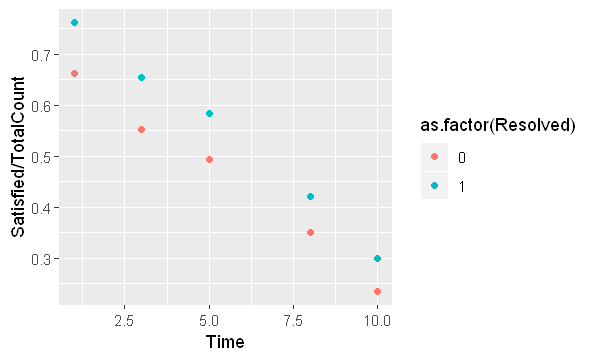

In [2]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data1, aes(x = Time, y = Satisfied/TotalCount, colour 
                  = as.factor(Resolved))) + geom_point()

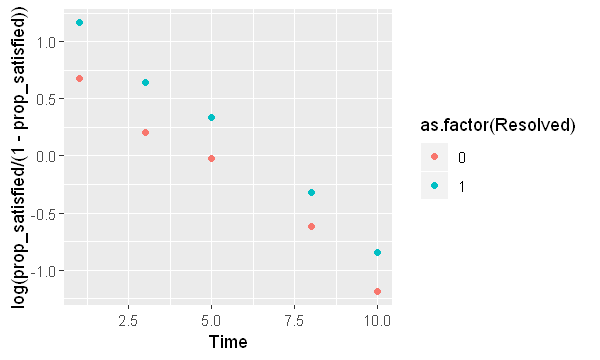

In [3]:
prop_satisfied = Satisfied/TotalCount
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data1, aes(x = Time, y = log(prop_satisfied/(1-prop_satisfied)), colour 
                  = as.factor(Resolved))) + geom_point()

The trend of the logit function vs time looks almost linear, seems like logistic regression would be a good fit. 

<b> Q2 <b/>

In [4]:
model1 = glm(Satisfied/TotalCount ~ Resolved + Time, weights = 
             TotalCount, family = binomial)

In [5]:
summary(model1)


Call:
glm(formula = Satisfied/TotalCount ~ Resolved + Time, family = binomial, 
    weights = TotalCount)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.46754  -0.28478  -0.03754   0.34630   0.44079  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.87899    0.12414   7.080 1.44e-12 ***
Resolved     0.41527    0.12510   3.319 0.000902 ***
Time        -0.19964    0.02327  -8.577  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 95.7521  on 9  degrees of freedom
Residual deviance:  1.0727  on 7  degrees of freedom
AIC: 55.886

Number of Fisher Scoring iterations: 3


$\hat{\beta}_{0} = 0.87899$

$\hat{\beta}_{Resolved} = 0.41527$

$\hat{\beta}_{Time} = -0.19964$

<b> Q3 <b/>

The log odds of customer satisfaction seem to increase by $0.41527$ for Resolved vs. Not Resolved (odds ratio is $e^{0.41527} = 1.5148$) holding Time fixed. Thus the odds of satisfaction are $51.48\% (= e^{0.41527}-1)$ higher for customers whose issues were resolved holding Time fixed.

<b> Q4 <b/>

The log odds of customer satisfaction seem to decrease by $-0.19964$ for a unit (1 minute) increase in time (odds ratio is $e^{-0.19964} = 0.8190$) holding all other variables fixed. Thus the odds of satisfaction are $18.09\% (= e^{-0.19964}-1)$ lower for 1 minute increase in time. 

<b> Q5 <b/>

In [6]:
new1 = data.frame(Time = 3, Resolved = 1)
new2 = data.frame(Time = 3, Resolved = 0)

In [7]:
predict(model1, new1)

1 
0.695354

In [8]:
predict(model1, new2)

1 
0.2800795

The mean log odds that a customer will be satisfied when their call took 3 minutes and their issue was resolved is $0.6953$. Odds ratio is $e^{0.6953} = 2.0043$. The odds that the customer will be satisfied are $100 \times \frac{2.0043}{1+2.0043}\% = 66.71\%$. 

The mean log odds that a customer will be satisfied when their call took 3 minutes and their issue was not resolved is $0.2801$. Odds ratio is $e^{0.2801} = 1.3233$. The odds that the customer will be satisfied are $100 \times \frac{1.3233}{1+1.3233}\% = 56.96\%$. 


In [9]:
data2 = read.csv('homework07data02.csv')
PriorWeekPurchase = data2[, 1]
LastWeekCompPurchase = data2[, 2]
Age = data2[, 3]
Region = data2[, 4]
Count = data2[, 5]
Purchase = data2[, 6]
PurchaseCount = data2[, 7]

<b> Q6 <b/>

In [10]:
model2 = glm(Purchase/Count ~ PriorWeekPurchase + LastWeekCompPurchase + 
             Age + Region, weights = Count, family = binomial)

In [11]:
summary(model2)


Call:
glm(formula = Purchase/Count ~ PriorWeekPurchase + LastWeekCompPurchase + 
    Age + Region, family = binomial, weights = Count)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6513  -0.8410   0.2038   0.7031   2.2835  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.33961    0.12612  -2.693  0.00709 ** 
PriorWeekPurchase     0.38392    0.08650   4.438 9.06e-06 ***
LastWeekCompPurchase -0.26885    0.08655  -3.106  0.00189 ** 
Age25 to 34           0.06858    0.12053   0.569  0.56935    
Age35 to 44          -0.14704    0.12190  -1.206  0.22773    
Age45+               -0.24521    0.12294  -1.995  0.04608 *  
Regionb               0.19027    0.12205   1.559  0.11902    
Regionc               0.24966    0.12165   2.052  0.04014 *  
Regiond               0.26563    0.12273   2.164  0.03044 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken

$\hat{\beta}_{0} = -0.33961 $

$\hat{\beta}_{PriorWeekPurchase} = 0.38392$

$\hat{\beta}_{LastWeekCompPurchase} = -0.26885$

$\hat{\beta}_{Age:25-34} = 0.06858$

$\hat{\beta}_{Age:35-44} = -0.14704$

$\hat{\beta}_{Age:45+} = -0.24521$

$\hat{\beta}_{Region-b} = 0.19027$

$\hat{\beta}_{Region-c} = 0.24966$

$\hat{\beta}_{Region-d} = 0.26563$


Null deviance - Residual Deviance = 43.714

<b> Q7 <b/>

In [12]:
1 - pchisq(model2$null.deviance-model2$deviance, 63-55)

[1] 6.44101e-07

$H_{0}:$ all $\beta$s are 0.

$H_{a}:$ atleast one $\beta$ is non zero.

P-value = Pr($\mathcal{X}_{1}^{2}>43.714$) ~ $0$

p-value << $\alpha = 0.05$ $\implies$ we reject $H_{0}$ $\implies$ We accept $H_{a}:$ atleast one $\beta$ is non zero.

Model is statistically significant.

<b> Q8 <b/>

In [13]:
c(deviance(model2), 1-pchisq(deviance(model2), 55))

[1] 74.99077286  0.03784636

In [14]:
pearres2 = residuals(model2,type="pearson")
pearson.tvalue = sum(pearres2^2)
c(pearson.tvalue, 1-pchisq(pearson.tvalue,55))

[1] 73.52257163  0.04830897

$H_0:$ the logistic model fits the data.

$H_a:$ the logistic model does not fit the data. 

With both deviance and Pearson residuals, p-value < $\alpha = $ 0.05, thus, we reject the null hypothesis of good fit with $\alpha = 0.05$.

With both deviance and Pearson residuals, p-value > $\alpha = $ 0.01, thus, we accept the null hypothesis of good fit with $\alpha = 0.01$.

<b> Q9 <b/>

In [15]:
model3 = glm(PurchaseCount ~ PriorWeekPurchase + LastWeekCompPurchase + Age + 
             Region + offset(log(Count)), family = "poisson")

In [16]:
summary(model3)


Call:
glm(formula = PurchaseCount ~ PriorWeekPurchase + LastWeekCompPurchase + 
    Age + Region + offset(log(Count)), family = "poisson")

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.48516  -0.65035  -0.06216   0.63731   2.77040  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.75055    0.04021  18.665  < 2e-16 ***
PriorWeekPurchase     0.39280    0.02678  14.669  < 2e-16 ***
LastWeekCompPurchase -0.21569    0.02663  -8.099 5.54e-16 ***
Age25 to 34           0.06285    0.03586   1.753  0.07967 .  
Age35 to 44          -0.04930    0.03686  -1.337  0.18110    
Age45+               -0.24960    0.03929  -6.352 2.12e-10 ***
Regionb               0.11974    0.03914   3.060  0.00222 ** 
Regionc               0.28095    0.03760   7.472 7.92e-14 ***
Regiond               0.17495    0.03876   4.513 6.38e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson

$\hat{\beta}_{0} = 0.75055 $

$\hat{\beta}_{PriorWeekPurchase} = 0.39280$

$\hat{\beta}_{LastWeekCompPurchase} = -0.21569$

$\hat{\beta}_{Age:25-34} = 0.06285$

$\hat{\beta}_{Age:35-44} = -0.04930$

$\hat{\beta}_{Age:45+} = -0.24960$

$\hat{\beta}_{Region-b} = 0.11974$

$\hat{\beta}_{Region-c} = 0.28095$

$\hat{\beta}_{Region-d} = 0.17495$


<b> Q10 <b/>

In [17]:
1 - pchisq(model3$null.deviance-model2$deviance, 63-55)

[1] 0

$H_{0}:$ all $\beta$s are 0.

$H_{a}:$ atleast one $\beta$ is non zero.

P-value = Pr($\mathcal{X}_{k}^{2}>Deviance$) = 0

p-value < $\alpha = 0.05$ $\implies$ we reject $H_{0}$ $\implies$ We accept $H_{a}:$ atleast one $\beta$ is non zero. 

Model is statistically significant.

<b> Q11 <b/>

In [18]:
c(deviance(model3), 1-pchisq(deviance(model3), 55))

[1] 70.20202452  0.08131349

In [19]:
pearres3 = residuals(model3,type="pearson")
pearson.tvalue = sum(pearres3^2)
c(pearson.tvalue, 1-pchisq(pearson.tvalue,55))

[1] 70.8523032  0.0736887

$H_0:$ the poisson model fits the data.

$H_a:$ the poisson model does not fit the data. 

In both cases, p-value > $\alpha = $ 0.05 and 0.01, thus, we accept the null hypothesis of good fit.

<b> Q12 <b/>

$H_0:$ $\hat{\beta}_{Age:25-34} = \hat{\beta}_{Age:35-44}$ = $\hat{\beta}_{Age:45+} = 0$

$H_a:$ Atleast one of $\hat{\beta}_{Age:25-34}, \hat{\beta}_{Age:35-44}, \hat{\beta}_{Age:45+}$ $\neq 0$

For the model made in 6, the p-value for $\beta_{Age:45+}$ is < $\alpha = 0.05$. Thus, we reject $H_0$. 

$\implies$ Atleast one of $\hat{\beta}_{Age:25-34}, \hat{\beta}_{Age:35-44}, \hat{\beta}_{Age:45+}$ $\neq 0$ 

$\implies$ categorical variable 'Age' is statistically significant.

<b> Q13 <b/>

$H_0:$ $\hat{\beta}_{Age:25-34} = \hat{\beta}_{Age:35-44}$ = $\hat{\beta}_{Age:45+} = 0$

$H_a:$ Atleast one of $\hat{\beta}_{Age:25-34}, \hat{\beta}_{Age:35-44}, \hat{\beta}_{Age:45+}$ $\neq 0$

For the model made in 9, the p-values for all $\hat{\beta}_{Age:25-34}, \hat{\beta}_{Age:35-44}$ are > $\alpha = 0.05$. But the p-value for $\hat{\beta}_{Age:45+}$ << $\alpha = 0.05$. Thus, we reject $H_0$. 

$\implies$ Atleast one of $\hat{\beta}_{Age:25-34}, \hat{\beta}_{Age:35-44}, \hat{\beta}_{Age:45+}$ $\neq 0$

$\implies$ Coefficients associated with Age cannot be 0.

<b> Q14 <b/>

$\hat{\beta}_{PriorWeekPurchase} = 0.38392$

The log odds of someone purchasing the new product seem to increase by $0.38392$ if the customer bought one of the company’s products in the previous week holding all other variables fixed. Odds ratio is $e^{0.38392} = 1.4680$. Thus, the odds of the customer purchasing the new product are $46.80\% (=e^{0.38392}-1)$ higher for customers who bought one of the company's products in the previous week.

<b> Q15 <b/>

$\hat{\beta}_{PriorWeekPurchase} = 0.39280$

If the customer bought one of the company’s products in the previous week, holding all other variables fixed, the rate ratio of new item purchased would be expected to increase by a factor of $e^{0.39280} = 1.4811$. 
